In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import sys
import os
import time

sys.path.append(os.path.join(os.environ['REPO_DIR'], 'utilities'))
from utilities2015 import *
from registration_utilities import *
from annotation_utilities import *
from metadata import *
from data_manager import *

import matplotlib.pyplot as plt
%matplotlib inline

Setting environment for Gordon


No vtk


In [2]:
stack_fixed = 'MD642'
stack_moving = 'atlasV2'

In [3]:
classifier_setting = 2

volume_fixed, structure_to_label_fixed, label_to_structure_fixed = \
DataManager.load_score_volume_all_known_structures(stack=stack_fixed, classifier_setting=classifier_setting)

File does not exist: /oasis/projects/nsf/csd395/yuncong/CSHL_volumes/MD642/MD642_down32_scoreVolume_clf_2/score_volumes/MD642_down32_scoreVolume_clf_2_outerContour.bp
Score volume for outerContour does not exist.
File does not exist: /oasis/projects/nsf/csd395/yuncong/CSHL_volumes/MD642/MD642_down32_scoreVolume_clf_2/score_volumes/MD642_down32_scoreVolume_clf_2_sp5.bp
Score volume for sp5 does not exist.


In [4]:
gradient_filepath_map_f = {ind_f: \
                           DataManager.get_score_volume_gradient_filepath_template(\
                            stack=stack_fixed, structure=struct_f, classifier_setting=classifier_setting)
                           for ind_f, struct_f in label_to_structure_fixed.iteritems()}

In [8]:
# volume_moving_structure_sizes = {l: np.count_nonzero(vol > 0) for l, vol in volume_moving.iteritems()}

# for lm, s in volume_moving_structure_sizes.iteritems():
#     print label_to_name_moving[lm], s, 'voxels'

# Rigid Align

In [75]:
classifier_setting = 2
warp_setting = 2

In [76]:
if warp_setting == 1:
    upstream_warp_setting = None    
    transform_type = 'affine'
elif warp_setting == 2:
    upstream_warp_setting = 1
    transform_type = 'rigid'
    include_surround = False
elif warp_setting == 4:
    upstream_warp_setting = 1
    transform_type = 'rigid'
    reg_weights = np.array([1e-6, 1e-6, 1e-6])
    include_surround = False
elif warp_setting == 5:
    upstream_warp_setting = 1
    transform_type = 'rigid'
    reg_weights = np.array([0,0,0])
    include_surround = True
else:
    raise Exception('Warp setting not recognized.')

In [8]:
std_tx_um = 100.
std_ty_um = 100.
std_tz_um = 100.
std_theta_xy = np.deg2rad(10)
grid_search_sample_number = 10000
terminate_thresh=1e-6
surround_weight = 0

# Regularized Rigid Align

In [68]:
classifier_setting = 2
warp_setting = 4

In [69]:
if warp_setting == 1:
    upstream_warp_setting = None    
    transform_type = 'affine'
elif warp_setting == 2:
    upstream_warp_setting = 1
    transform_type = 'rigid'
    include_surround = False
elif warp_setting == 4:
    upstream_warp_setting = 1
    transform_type = 'rigid'
    reg_weights = np.array([1e-6, 1e-6, 1e-6])
    include_surround = False
elif warp_setting == 5:
    upstream_warp_setting = 1
    transform_type = 'rigid'
    reg_weights = np.array([0,0,0])
    include_surround = True
else:
    raise Exception('Warp setting not recognized.')

In [70]:
std_tx_um = 100.
std_ty_um = 100.
std_tz_um = 100.
std_theta_xy = np.deg2rad(10)
grid_search_sample_number = 10000
terminate_thresh=1e-6
surround_weight = 0

# Rigid Align with Surround

In [ ]:
# Using surround some times have bad effect. Especially if the negative weight is high.

In [42]:
classifier_setting = 2
warp_setting = 5

In [36]:
if warp_setting == 1:
    upstream_warp_setting = None    
    transform_type = 'affine'
elif warp_setting == 2:
    upstream_warp_setting = 1
    transform_type = 'rigid'
    include_surround = False
elif warp_setting == 4:
    upstream_warp_setting = 1
    transform_type = 'rigid'
    reg_weights = np.array([1e-6, 1e-6, 1e-6])
    include_surround = False
elif warp_setting == 5:
    upstream_warp_setting = 1
    transform_type = 'rigid'
    reg_weights = np.array([0,0,0])
    include_surround = True
else:
    raise Exception('Warp setting not recognized.')

In [37]:
# std_tx_um = 600.
# std_ty_um = 600.
# std_tz_um = 1000.
std_tx_um = 200.
std_ty_um = 200.
std_tz_um = 200.
std_theta_xy = np.deg2rad(10)
grid_search_sample_number = 10000
terminate_thresh=1e-6
surround_weight = -.1
grid_search_iteration_number=20
grad_computation_sample_number=1e5

# Align using Affine + Surround

In [43]:
classifier_setting = 2
warp_setting = 6

In [44]:
if warp_setting == 1:
    upstream_warp_setting = None    
    transform_type = 'affine'
elif warp_setting == 2:
    upstream_warp_setting = 1
    transform_type = 'rigid'
    include_surround = False
elif warp_setting == 4:
    upstream_warp_setting = 1
    transform_type = 'rigid'
    reg_weights = np.array([1e-6, 1e-6, 1e-6])
    include_surround = False
elif warp_setting == 5:
    upstream_warp_setting = 1
    transform_type = 'rigid'
    reg_weights = np.array([0,0,0])
    include_surround = True
elif warp_setting == 6:
    upstream_warp_setting = 1
    transform_type = 'affine'
    reg_weights = np.array([0,0,0])
    include_surround = True
else:
    raise Exception('Warp setting not recognized.')

In [45]:
std_tx_um = 200.
std_ty_um = 200.
std_tz_um = 200.
std_theta_xy = np.deg2rad(10)
grid_search_sample_number = 10000
terminate_thresh=1e-6
surround_weight = -.1
grid_search_iteration_number=20
grad_computation_sample_number=1e5

# General Align Code

Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


set([8])


load gradient 8: 6.876822 seconds
overall: 6.876987 seconds
grid search: 3.002134 seconds
-inf 0.010193
grid search: 2.045725 seconds
0.010193 0.010847
grid search: 1.511048 seconds
0.010847 0.011790
grid search: 1.109300 seconds
0.011790 0.012345
grid search: 0.878091 seconds
0.012345 0.012663
grid search: 0.775157 seconds
0.012663 0.012946
grid search: 0.559250 seconds
0.012946 0.013218
grid search: 0.481648 seconds
0.013218 0.013232
grid search: 0.358716 seconds
0.013232 0.013238
grid search: 0.359932 seconds
grid search: 0.352151 seconds
grid search: 0.270101 seconds
0.013238 0.013250
grid search: 0.253728 seconds
grid search: 0.258499 seconds
0.013250 0.013254
grid search: 0.252736 seconds
grid search: 0.256207 seconds
grid search: 0.253337 seconds
grid search: 0.260582 seconds
0.013254 0.013255
grid search: 0.253705 seconds
grid search: 0.254886 seconds
0.013255 0.013258
iteration 0
step: 0.09 seconds
score: 0.013258
iteration 1
step: 0.02 seconds
score: 0.010439
iteration 2
step

params_best_upToNow [  3.20034902  17.18155797 -15.27445977   0.20640539]


step: 0.02 seconds
score: 0.013578
iteration 9
step: 0.01 seconds
score: 0.013509
iteration 10
step: 0.01 seconds
score: 0.013456
iteration 11
step: 0.01 seconds
score: 0.013390
iteration 12
step: 0.01 seconds
score: 0.013290
iteration 13
step: 0.01 seconds
score: 0.013271
iteration 14
step: 0.01 seconds
score: 0.013263
iteration 15
step: 0.01 seconds
score: 0.013240
iteration 16
step: 0.01 seconds
score: 0.013316
iteration 17
step: 0.01 seconds
score: 0.013366
iteration 18
step: 0.01 seconds
score: 0.013451
iteration 19
step: 0.01 seconds
score: 0.013525
iteration 20
step: 0.01 seconds
score: 0.013556
iteration 21
step: 0.01 seconds
score: 0.013595
iteration 22
step: 0.01 seconds
score: 0.013644
iteration 23
step: 0.01 seconds
score: 0.013621
iteration 24
step: 0.01 seconds
score: 0.013633
iteration 25
step: 0.01 seconds
score: 0.013636
iteration 26
step: 0.01 seconds
score: 0.013602
iteration 27
step: 0.01 seconds
score: 0.013562
iteration 28
step: 0.01 seconds
score: 0.013509
iterat

[[ 0.02745184  0.30021213  0.95347736  8.88433992]
 [-0.85742025  0.49741808 -0.13193095  1.17020636]
 [-0.51388415 -0.81390904  0.271063   -3.10154   ]]


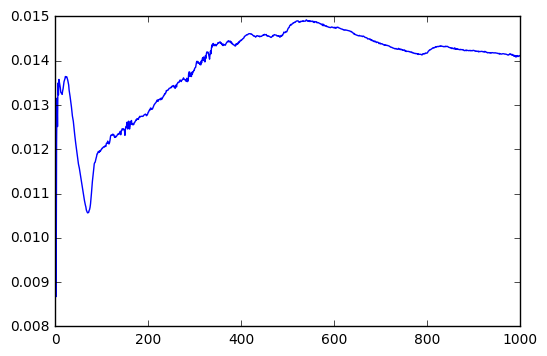

0.0149225317973 0.014112270535


In [71]:
trial_num = 1

for trial_idx in range(trial_num):
    
    if trial_idx in [0, 1]:
        upstream_trial_idx = 0
        
#     for structure in all_known_structures_sided:
    for structure in ['7n_L']:

#         try:

        if include_surround:
            volume_moving = DataManager.load_transformed_volume_all_known_structures(stack_m=stack_moving, stack_f=stack_fixed,
                                                                         classifier_setting_m=classifier_setting,
                                                                         classifier_setting_f=classifier_setting,
                                                                         warp_setting=upstream_warp_setting, 
                                                                         trial_idx=upstream_trial_idx,
                                                                         structures=[structure, 
                                                                                     convert_to_surround_name(structure, margin='x1.5')])
        else:
            volume_moving = DataManager.load_transformed_volume_all_known_structures(stack_m=stack_moving, stack_f=stack_fixed,
                                                                         classifier_setting_m=classifier_setting,
                                                                         classifier_setting_f=classifier_setting,
                                                                         warp_setting=upstream_warp_setting, 
                                                                         trial_idx=upstream_trial_idx,
                                                                         structures=[structure])

        structure_to_label_moving = {s: l+1 for l, s in enumerate(sorted(volume_moving.keys()))}
        label_to_structure_moving = {l+1: s for l, s in enumerate(sorted(volume_moving.keys()))}
        volume_moving = {structure_to_label_moving[s]: v for s, v in volume_moving.items()}

        label_mapping_m2f = {label_m: structure_to_label_fixed[convert_to_original_name(name_m)] 
                             for label_m, name_m in label_to_structure_moving.iteritems()}

        label_weights_m = {label_m: surround_weight if 'surround' in name_m else 1. \
                           for label_m, name_m in label_to_structure_moving.iteritems()}


        aligner = Aligner4(volume_fixed, volume_moving, 
                           labelIndexMap_m2f=label_mapping_m2f)

        aligner.set_centroid(centroid_m='structure_centroid', centroid_f='centroid_m', 
                             indices_m=[structure_to_label_moving[structure]])                            

        aligner.load_gradient(gradient_filepath_map_f=gradient_filepath_map_f) # 120s = 2 mins

        aligner.set_regularization_weights(reg_weights)
        aligner.set_label_weights(label_weights_m)
        
        std_tx = std_tx_um/(XY_PIXEL_DISTANCE_LOSSLESS*32)
        std_ty = std_ty_um/(XY_PIXEL_DISTANCE_LOSSLESS*32)
        std_tz = std_tz_um/(XY_PIXEL_DISTANCE_LOSSLESS*32)

        T, scores = aligner.optimize(type=transform_type, 
                                     max_iter_num=1000, history_len=50, terminate_thresh=terminate_thresh,
                                    grid_search_iteration_number=grid_search_iteration_number,
                                     grid_search_sample_number=grid_search_sample_number,
                                     grad_computation_sample_number=grad_computation_sample_number,
                                     lr1=10, lr2=0.1,
                                    std_tx=std_tx, std_ty=std_ty, std_tz=std_tz, std_theta_xy=std_theta_xy,
                                    epsilon=1e-8)

        print T.reshape((3,4))
        plt.figure();
        plt.plot(scores);
        plt.show();
        print max(scores), scores[-1]

#         params_fp = \
#         DataManager.get_alignment_parameters_filepath(stack_m=stack_moving, stack_f=stack_fixed,
#                                                       classifier_setting_m=classifier_setting,
#                                                       classifier_setting_f=classifier_setting,
#                                                       warp_setting=warp_setting,
#                                                       param_suffix=structure,
#                                                       trial_idx=trial_idx)

#         create_if_not_exists(os.path.dirname(params_fp))

#         DataManager.save_alignment_parameters(params_fp, T, 
#                                               aligner.centroid_m, aligner.centroid_f,
#                                               aligner.xdim_m, aligner.ydim_m, aligner.zdim_m, 
#                                               aligner.xdim_f, aligner.ydim_f, aligner.zdim_f)

#         score_plot_fp = \
#         DataManager.get_alignment_score_plot_filepath(stack_m=stack_moving, stack_f=stack_fixed,
#                                                       classifier_setting_m=classifier_setting,
#                                                       classifier_setting_f=classifier_setting,
#                                                       warp_setting=warp_setting,
#                                                       param_suffix=structure,
#                                                       trial_idx=trial_idx)
#             fig = plt.figure();
#             plt.plot(scores);
#             plt.savefig(score_plot_fp, bbox_inches='tight')
#             plt.close(fig)

#         except Exception as e:
#             sys.stderr.write('%s\n' % e)
#             sys.stderr.write('Error transforming volume %s.\n' % structure)

# Draw Results

In [72]:
t = time.time()

# local_params, centroid_m, centroid_f, xdim_m, ydim_m, zdim_m, xdim_f, ydim_f, zdim_f = \
# DataManager.load_alignment_parameters(stack_m=stack_moving, stack_f=stack_fixed,
#                                       classifier_setting_m=classifier_setting,
#                                       classifier_setting_f=classifier_setting,
#                                       warp_setting=warp_setting,
#                                       param_suffix=structure,
#                                       trial_idx=trial_idx)

local_params, centroid_m, centroid_f, xdim_m, ydim_m, zdim_m, xdim_f, ydim_f, zdim_f = \
(T, 
  aligner.centroid_m, aligner.centroid_f,
  aligner.xdim_m, aligner.ydim_m, aligner.zdim_m, 
  aligner.xdim_f, aligner.ydim_f, aligner.zdim_f)


# Read global tx
global_transformed_moving_structure_vol = \
DataManager.load_transformed_volume(stack_m=stack_moving, stack_f=stack_fixed,
                                    classifier_setting_m=classifier_setting,
                                    classifier_setting_f=classifier_setting,
                                    warp_setting=upstream_warp_setting, 
                                    trial_idx=upstream_trial_idx,
                                    structure=structure)

# Transform
local_transformed_moving_structure_vol = transform_volume(vol=global_transformed_moving_structure_vol, 
                                         global_params=local_params, 
                                         centroid_m=centroid_m, centroid_f=centroid_f,
                                         xdim_f=xdim_f, ydim_f=ydim_f, zdim_f=zdim_f)

#         # Save
#         local_transformed_moving_structure_fn = \
#         DataManager.get_transformed_volume_filepath(stack_m=stack_moving, stack_f=stack_fixed,
#                                                     classifier_setting_m=classifier_setting,
#                                                     classifier_setting_f=classifier_setting,
#                                                     warp_setting=warp_setting,
#                                                     trial_idx=trial_idx,
#                                                     structure=structure)

#         create_if_not_exists(os.path.dirname(local_transformed_moving_structure_fn))
#         bp.pack_ndarray_file(local_transformed_moving_structure_vol, local_transformed_moving_structure_fn)

sys.stderr.write('Transform: %.2f seconds.\n' % (time.time() - t))

Transform: 5.29 seconds.


In [73]:
# Set colors for different contour level
levels = [0.1, 0.25, 0.5, 0.75, .99]
level_colors = {level: (int(level*255),0,0) for level in levels}

0 896 0 486 108 494
67


Error loading scoremap for section 132


70


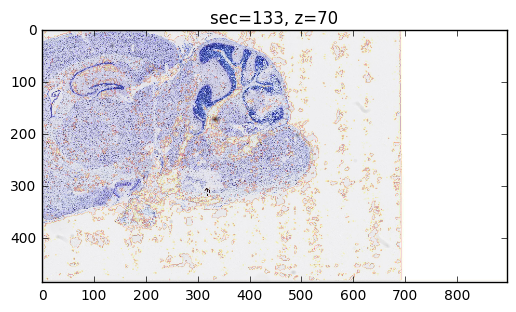

Error loading scoremap for section 134


73


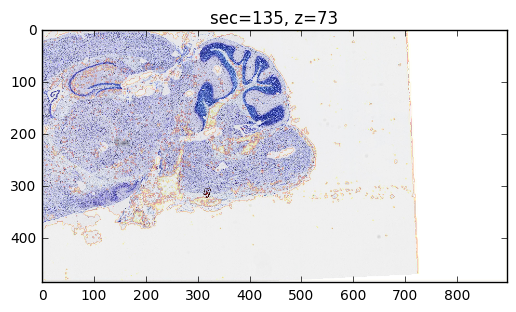

74


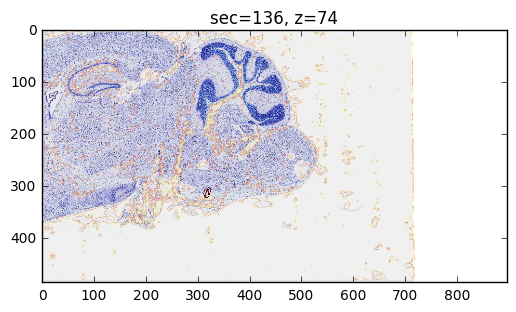

Error loading scoremap for section 137
Error loading scoremap for section 138


78


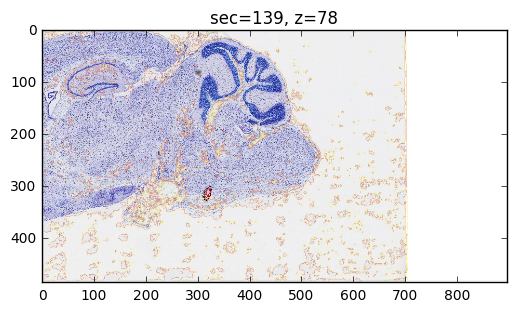

Error loading scoremap for section 140


81


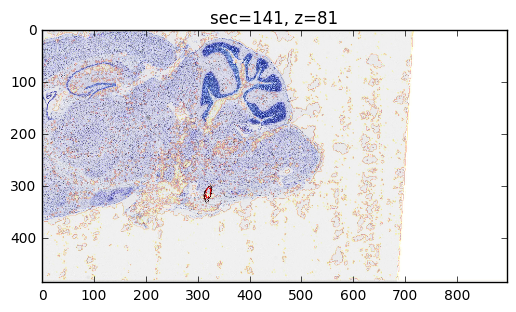

Error loading scoremap for section 142


84


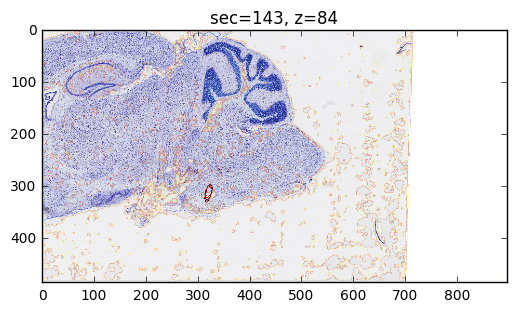

85


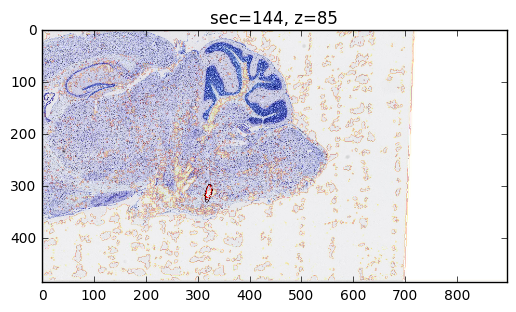

Error loading scoremap for section 145
Error loading scoremap for section 146


89


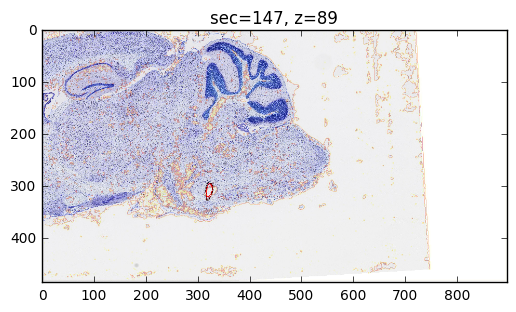

Error loading scoremap for section 148


92


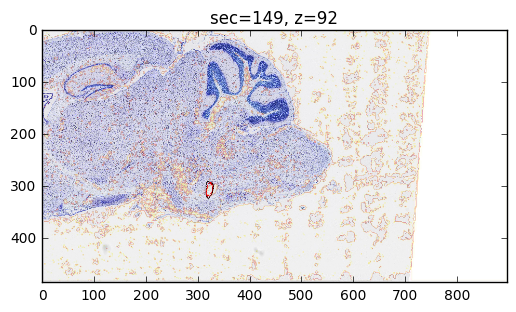

Error loading scoremap for section 150


95


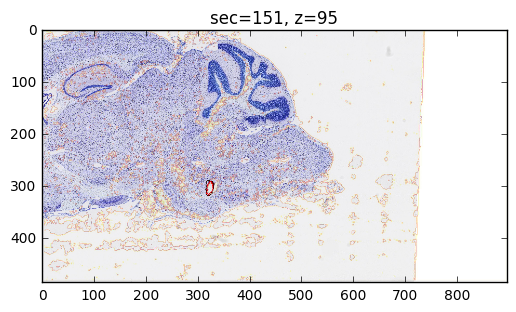

Error loading scoremap for section 152


97


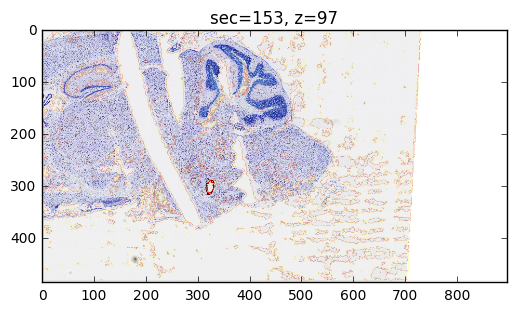

Error loading scoremap for section 154


100


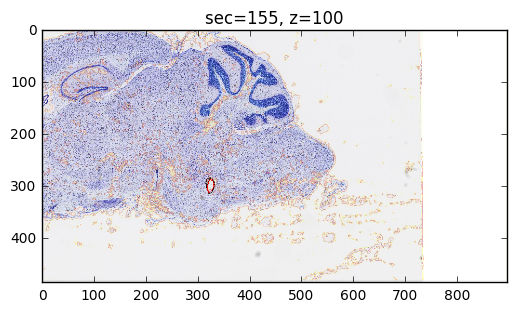

Error loading scoremap for section 156


103


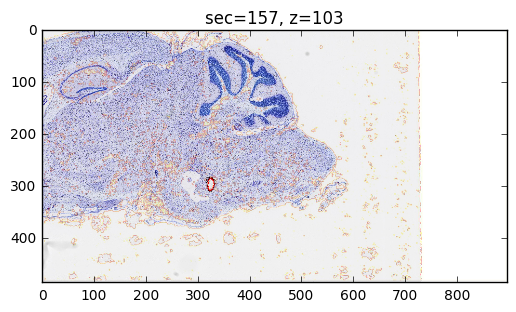

Error loading scoremap for section 158


105


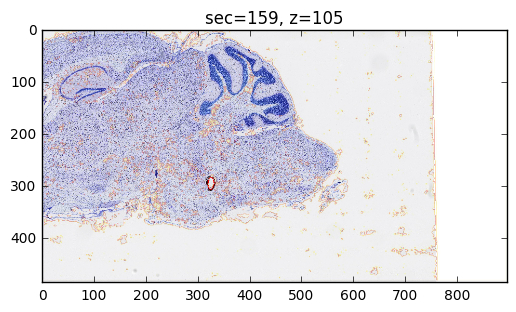

Error loading scoremap for section 160


108


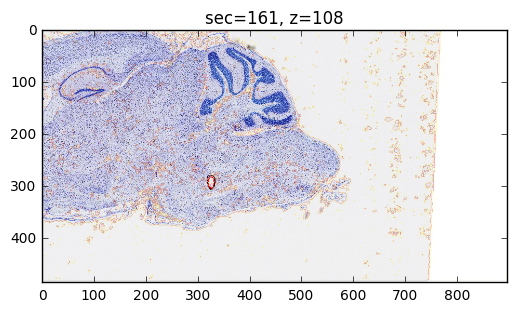

Error loading scoremap for section 162
Error loading scoremap for section 164
Error loading scoremap for section 165
Error loading scoremap for section 166
Error loading scoremap for section 167
Error loading scoremap for section 168
Error loading scoremap for section 169
Error loading scoremap for section 170


122


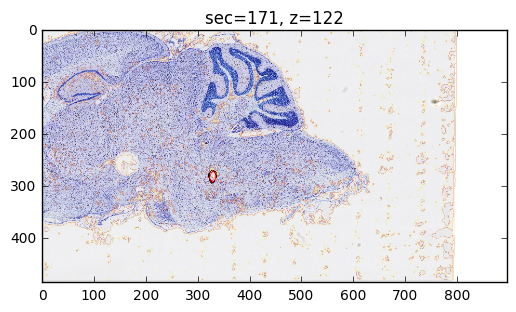

Error loading scoremap for section 172
Error loading scoremap for section 173
Error loading scoremap for section 174


127


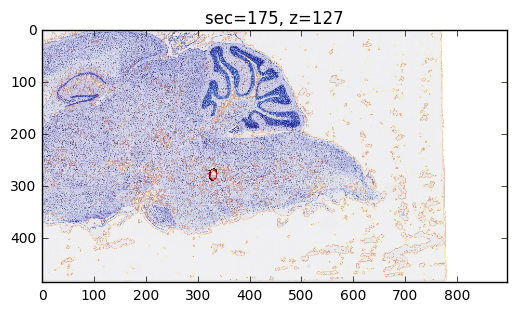

Error loading scoremap for section 176


130


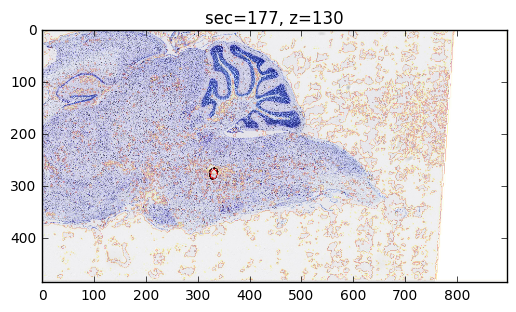

Error loading scoremap for section 178


133


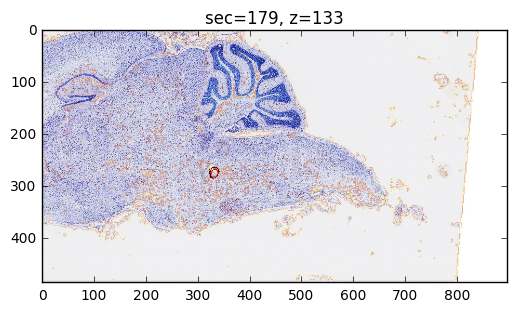

Error loading scoremap for section 181
Error loading scoremap for section 182
Error loading scoremap for section 183
Error loading scoremap for section 184
Error loading scoremap for section 185
Error loading scoremap for section 186
Error loading scoremap for section 187
Error loading scoremap for section 188
Error loading scoremap for section 189
Error loading scoremap for section 190
Error loading scoremap for section 191
Error loading scoremap for section 192
Error loading scoremap for section 193
Error loading scoremap for section 194


154


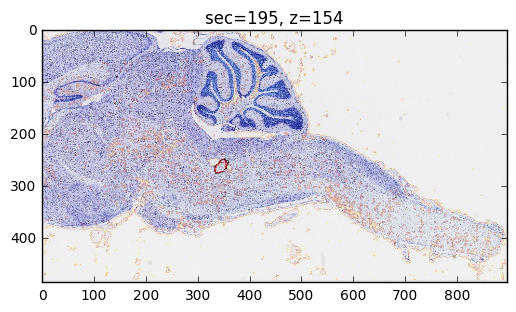

Error loading scoremap for section 196


157


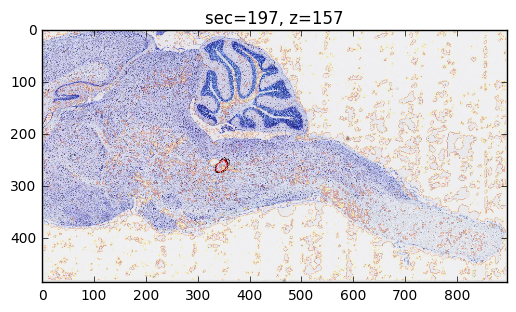

Error loading scoremap for section 198


160


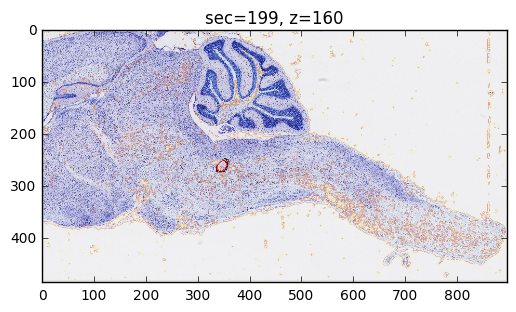

Error loading scoremap for section 200


163


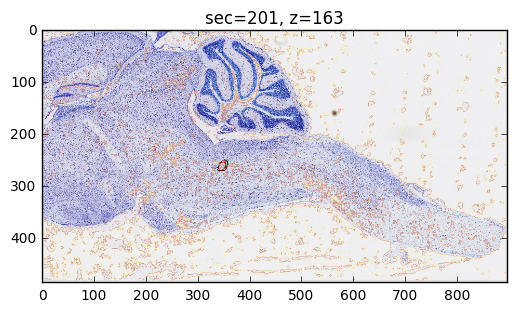

Error loading scoremap for section 202


165


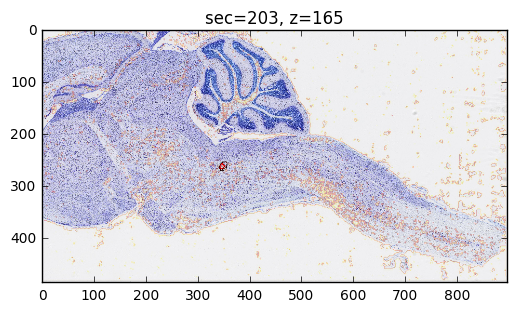

Error loading scoremap for section 204


168


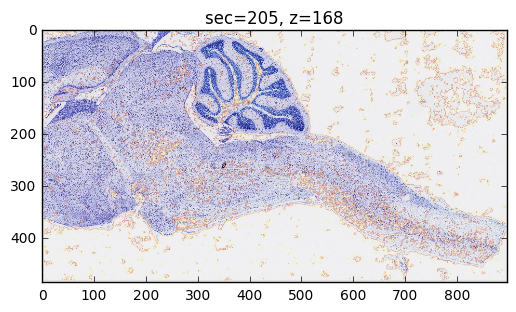

In [74]:
# Generate overlay visualization

# estimate mapping between z and section
# downsample_factor = 32
# xy_pixel_distance_downsampled = XY_PIXEL_DISTANCE_LOSSLESS * downsample_factor
# voxel_z_size = SECTION_THICKNESS / xy_pixel_distance_downsampled

# For getting correct contour location
xmin_vol_f, xmax_vol_f, ymin_vol_f, ymax_vol_f, zmin_vol_f, zmax_vol_f = \
DataManager.load_volume_bbox(stack=stack_fixed, type='score', structure='7N', 
                             downscale=32, classifier_setting=classifier_setting)
print xmin_vol_f, xmax_vol_f, ymin_vol_f, ymax_vol_f, zmin_vol_f, zmax_vol_f

# Generate atlas overlay image for every section

zf, zl = bbox_3d(local_transformed_moving_structure_vol)[4:]
sec_first = DataManager.convert_z_to_section(stack=stack_fixed, z=zf, downsample=32)
sec_last = DataManager.convert_z_to_section(stack=stack_fixed, z=zl, downsample=32)

for sec in range(sec_first, sec_last+1):
# for sec in [155]:
    
    if is_invalid(metadata_cache['sections_to_filenames'][stack_fixed][sec]):
        continue
    
#     img_fn = DataManager.get_image_filepath(stack=stack_fixed, section=sec, resol='thumbnail', version='cropped_tif')
#     img = imread(img_fn)
    
    try:
        img = imread(DataManager.get_scoremap_viz_filepath(stack=stack_fixed, section=sec, 
                                                           structure=convert_to_original_name(structure), 
                                                           setting=classifier_setting))
    except:
        sys.stderr.write('Error loading scoremap for section %d\n' % sec)
        continue
        
    img = img[::4, ::4]
    
    viz = img.copy()
    
    z1, z2 = DataManager.convert_section_to_z(stack=stack_fixed, sec=sec, downsample=32)
    z = int(z1)
    print z
    
    # Find moving volume annotation contours
    c = 0
    vol = local_transformed_moving_structure_vol
    for level in levels:
        cnts = find_contours(vol[..., z], level=level) # rows, cols
        c += len(cnts)
        for cnt in cnts:
            # r,c to x,y
            cnt_on_cropped = cnt[:,::-1] + (xmin_vol_f, ymin_vol_f)
            cv2.polylines(viz, [cnt_on_cropped.astype(np.int)], True, level_colors[level], 1)
    
    if c > 0:    
        plt.figure();
        plt.title("sec=%d, z=%d" % (sec, z));
        plt.imshow(viz);
        plt.show();
    
#     viz_fp = DataManager.get_alignment_viz_filepath(stack_m=stack_moving,
#                                             stack_f=stack_fixed,
#                                             classifier_setting_m=classifier_setting,
#                                             classifier_setting_f=classifier_setting,
#                                             warp_setting=warp_setting,
#                                           section=sec)
    
#     create_if_not_exists(os.path.dirname(viz_fp))
#     imsave(viz_fp, viz)

# POLYRIGID TRANSFORM

In [ ]:
annotation_structure_sizes = {s: len(parallel_where_binary(volume_annotation == name_to_label_annotation[s])) 
                              for s in structures_sided}
annotation_structure_sizes_precent = {s: float(size)/sum(annotation_structure_sizes.values()) 
                                      for s, size in annotation_structure_sizes.iteritems()}

In [ ]:
annotation_structure_radius = {}
# annotation_structure_axes = {}
annotation_structure_covars = {}
for s in structures_sided:
    nzs = parallel_where_binary(volume_annotation == name_to_label_annotation[s])
    nzsc = nzs - nzs.mean(axis=0)
    C = np.dot(nzsc.T, nzsc)/float(len(nzsc))
    S, V = np.linalg.eigh(C)
#     annotation_structure_axes[s] = V
    annotation_structure_radius[s] = np.sqrt(S)
    annotation_structure_covars[s] = C
#     alpha = 1.
#     scaled_C = np.dot(np.dot(V.T, alpha*S), V)
#     annotation_structure_covars[s] = scaled_C

In [ ]:
# Read Transform of each structure, do polyrigid transform

volume_m_aligned_to_f_allAnnotatedBrains = {}

stack = 'MD589'
volume_annotation = volumes_annotation[stack]

# for stack, volume_annotation in volumes_annotation.iteritems():

rigid_parameters_list = []
anchor_points = []
# sigmas = [1. for _ in structures_sided]

alpha = 1.
sigmas = [alpha * annotation_structure_covars[s] for s in structures_sided]

# weights = [1. for s in structures_sided]
weights = [annotation_structure_sizes_precent[s] for s in structures_sided]

for name_s in structures_sided:
# for name_s in ['VLL_L']:

    try:
        tx_params, centroid_m, centroid_f, xdim_m, ydim_m, zdim_m, xdim_f, ydim_f, zdim_f = \
        DataManager.load_local_alignment_parameters(stack_moving=stack_moving,
                                                    moving_volume_type='score',
                                                    stack_fixed=stack_fixed,
                                                    fixed_volume_type='score',
                                                    train_sample_scheme=train_sample_scheme,
                                                    global_transform_scheme=global_transform_scheme,
                                                    local_transform_scheme=local_transform_scheme,
                                                   label=name_s,
                                                   trial_idx=1)

        rigid_parameters_list.append((tx_params, centroid_m, centroid_f, xdim_m, ydim_m, zdim_m, xdim_f, ydim_f, zdim_f))
        anchor_points.append(centroid_m)
    except:
        sys.stderr.write('Cannot load parameters for %s.\n' % name_s)

In [ ]:
volume_m_aligned_to_f_allAnnotatedBrains[stack] = transform_volume_polyrigid(volume_annotation, 
                                                                             rigid_parameters_list, 
                                                                             anchor_points, sigmas, 
                                                                             weights)

In [ ]:
viz_dir = create_if_not_exists(DataManager.get_local_alignment_viz_dir(stack_moving=stack_moving,
                                                        stack_fixed=stack_fixed,
                                                        moving_volume_type='score',
                                                        fixed_volume_type='score',
                                                        train_sample_scheme=train_sample_scheme,
                                                        global_transform_scheme=global_transform_scheme,
                                                        local_transform_scheme=5))

In [ ]:
bar = show_progress_bar(first_sec, last_sec)

for sec in range(first_sec, last_sec+1):
# for sec in range(140, 160):
    
    if metadata_cache['sections_to_filenames'][stack_fixed][sec] in ['Placeholder', 'Rescan', 'Nonexisting']:
            continue

    bar.value = sec

    img_fn = DataManager.get_image_filepath(stack=stack_fixed, section=sec, resol='thumbnail', version='cropped_tif')
    img = imread(img_fn)

#         img_fn = DataManager.get_scoremap_viz_filepath(stack=stack_fixed, section=sec, label='7N', train_sample_scheme=train_sample_scheme)
#         img = imread(img_fn)[::4, ::4]

    viz = img.copy()

    z = voxel_z_size * (sec - 1) - zmin_vol_f
    
    ##############################################
    
#     for stack, volume_m_aligned_to_f in volume_m_aligned_to_f_allAnnotatedBrains.iteritems():

    stack = 'MD589'
    volume_m_aligned_to_f = volume_m_aligned_to_f_allAnnotatedBrains[stack]
            
    contours_m_alignedTo_f_on_volume = find_contour_points(volume_m_aligned_to_f[..., int(z)])
    contours_m_alignedTo_f_on_cropped = {i: [cnt + (xmin_vol_f, ymin_vol_f) for cnt in cnts] 
                                         for i, cnts in contours_m_alignedTo_f_on_volume.iteritems()}

#     # Draw fixed volume annotation contours
#     for ind_f, cnts_f in contours_f_on_cropped.iteritems():
#         for cnt_f in cnts_f:
#             cv2.polylines(viz, [cnt_f.astype(np.int)], True, (0,255,0), 2)

    # Draw moving volume annotation contours
    for ind_m, cnts_m in contours_m_alignedTo_f_on_cropped.iteritems():
        for cnt_m in cnts_m:
#             cv2.polylines(viz, [cnt_m.astype(np.int)], True, stack_colors[stack], 2)
            cv2.polylines(viz, [cnt_m.astype(np.int)], True, structure_colors[convert_name_to_unsided(label_to_name_moving[ind_m])], 1)

            # put label texts
#             label_pos = cnt_m.mean(axis=0).astype(np.int)
#             cv2.putText(viz, convert_name_to_unsided(name_s), tuple(label_pos), 
#                         cv2.FONT_HERSHEY_DUPLEX, .5, ((0,0,0)), 1)

    viz_fn = os.path.join(viz_dir, '%(stack_moving)s_over_%(stack_fixed)s_%(sec)04d.jpg' % \
          {'stack_moving': stack_moving, 'stack_fixed': stack_fixed, 'sec': sec})
    imsave(viz_fn, viz)

#     plt.figure(figsize=(10, 10));
#     plt.imshow(viz);
#     plt.show();

In [ ]:
# TRANSFORM VOLUMES

In [ ]:
# Transforming each volume (only relevant structure is activated) according to computed local transforms

volume_m_aligned_to_f_allNames = {'MD589': {}, 'MD594': {}}

for name_s in structures_sided:
# for name_s in ['VLL_L']:
        
    print name_s

    try:
        tx_params, centroid_m, centroid_f, xdim_m, ydim_m, zdim_m, xdim_f, ydim_f, zdim_f = \
        DataManager.load_local_alignment_parameters(stack_moving=stack_moving,
                                                    moving_volume_type='score',
                                                    stack_fixed=stack_fixed,
                                                    fixed_volume_type='score',
                                                    train_sample_scheme=train_sample_scheme,
                                                    global_transform_scheme=global_transform_scheme,
                                                    local_transform_scheme=local_transform_scheme,
                                                   label=name_s)

    except Exception as e:
        
        sys.stderr.write(e.message + '\n')
        
        tx_params = (1,0,0,0,0,1,0,0,0,0,1,0)
        centroid_m = (0,0,0)
        centroid_f = (0,0,0)
        xdim_f, ydim_f, zdim_f = (vol_fixed_xdim, vol_fixed_ydim, vol_fixed_zdim)


    for stack, volume_annotation in volumes_annotation.iteritems():
        volume_m_aligned_to_f_allNames[stack][name_s] = \
        transform_volume(vol=volume_annotation==name_to_label_annotation[name_s], 
                           global_params=tx_params, 
                           centroid_m=centroid_m, 
                           centroid_f=centroid_f,
                          xdim_f=xdim_f,
                          ydim_f=ydim_f,
                          zdim_f=zdim_f)

In [ ]:
bar = show_progress_bar(first_sec, last_sec)

# for sec in range(first_sec, last_sec+1):
for sec in range(140, 160):
    
    if metadata_cache['sections_to_filenames'][stack_fixed][sec] in ['Placeholder', 'Rescan', 'Nonexisting']:
            continue

    bar.value = sec

    img_fn = DataManager.get_image_filepath(stack=stack_fixed, section=sec, resol='thumbnail', version='cropped_tif')
    img = imread(img_fn)

#         img_fn = DataManager.get_scoremap_viz_filepath(stack=stack_fixed, section=sec, label='7N', train_sample_scheme=train_sample_scheme)
#         img = imread(img_fn)[::4, ::4]

    viz = img.copy()

    z = voxel_z_size * (sec - 1) - zmin_vol_f
    
    ##############################################
    
    for stack, x in volume_m_aligned_to_f_allNames.iteritems():
        for name_s, volume_m_aligned_to_f in x.iteritems():
        
            contours_m_alignedTo_f_on_volume = find_contour_points(volume_m_aligned_to_f[..., int(z)])
            contours_m_alignedTo_f_on_cropped = {i: [cnt + (xmin_vol_f, ymin_vol_f) for cnt in cnts] 
                                                 for i, cnts in contours_m_alignedTo_f_on_volume.iteritems()}

        #     # Draw fixed volume annotation contours
        #     for ind_f, cnts_f in contours_f_on_cropped.iteritems():
        #         for cnt_f in cnts_f:
        #             cv2.polylines(viz, [cnt_f.astype(np.int)], True, (0,255,0), 2)

            # Draw moving volume annotation contours
            for ind_m, cnts_m in contours_m_alignedTo_f_on_cropped.iteritems():
                for cnt_m in cnts_m:
                    cv2.polylines(viz, [cnt_m.astype(np.int)], True, stack_colors[stack], 2)
                    
                    # put label texts
                    label_pos = cnt_m.mean(axis=0).astype(np.int)
                    cv2.putText(viz, convert_name_to_unsided(name_s), tuple(label_pos), 
                                cv2.FONT_HERSHEY_DUPLEX, .5, ((0,0,0)), 1)

    viz_fn = os.path.join(viz_dir, '%(stack_moving)s_over_%(stack_fixed)s_%(sec)04d.jpg' % \
          {'stack_moving': stack_moving, 'stack_fixed': stack_fixed, 'sec': sec})
#     imsave(viz_fn, viz)

#     plt.figure(figsize=(10, 10));
#     plt.imshow(viz);
#     plt.show();